## Import Library

In [1]:
import os
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

## Load Titanic Dataset

In [2]:
dataset = pd.read_csv("titanic.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Load titanic_test Dataset

In [3]:
test_dataset = pd.read_csv("titanic_test.csv")
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Membuat Dataframe train_data

In [4]:
train_data = dataset[['Sex', 'Age', 'Pclass', 'Fare']].copy()
train_data['Age'] = train_data.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))

train_data.isnull().sum()

Sex       0
Age       0
Pclass    0
Fare      0
dtype: int64

**ANALISIS**

disini saya membuat data train, agar tidak merusak dataset utama di sini saya akan mencopy data yang akan saya jadikan data train yakni fitur sex,age,pclass dan fare. Setelah itu saya akan mengisi nilai Nan pada kolom age dengan nilai rata-rata dari kelas masing-masing dengan cara  melakukan groupby dulu berdasarkan pclass kemudian fungsi lambda ini akan menghitung nilai rata-rata semua nilai age dari kelas pclass masing-masing 

## Membuat Dataframe test_data

In [5]:
test_data = test_dataset[['Sex', 'Age', 'Pclass', 'Fare']].copy()
test_data.head()

,Sex,Age,Pclass,Fare
0,male,34.5,3,7.8292
1,female,47.0,3,7.0000
2,male,62.0,2,9.6875
3,male,27.0,3,8.6625
4,female,22.0,3,12.2875


**ANALISIS**

disini saya juga membuat data tes dengan cara mencopy dari dataset awal agar tidak merusak data set awal. Untuk datatest ini saya hanya mengambil beberapa fitur saja yakni sex,age,pclass, dan fare

## Membuat Dataframe train_label

In [6]:
train_label = dataset[['Survived']].copy()
train_label.head()

,Survived
0,0
1,1
2,1
3,1
4,0


**ANALISIS**

disini saya juga membuat data train_labe dengan cara mencopy dari dataset awal agar tidak merusak data set awal. Untuk datatest ini saya hanya mengambil fitur survived

## Load titanic_testlabel Dataset

In [7]:
test_label = pd.read_csv("titanic_testlabel.csv")
test_label = test_label.drop(columns=['PassengerId'])
test_label.head()

,Survived
0,0
1,1
2,0
3,0
4,1


**ANALISIS**

disini saya load dataset titanic_label,namun dataset ini saya hanya membutuhkan fitur survived jadi fitur PassengerId saya hapus karena tidak di perlukan

## Konversi Variabel Kategorik

In [8]:
train_data["Sex"] = train_data["Sex"].map({"male": 0, "female": 1})
test_data["Sex"] = test_data["Sex"].map({"male": 0, "female": 1})

**ANALISIS**

untuk memudahkan klasifikasi  disini saya merubah data pada fitur sex yang awalnya berupa kata saya rubah menjadi angka agar bisa di proses dengan algoritma deciison tree

## Klasifikasi Decision Tree dan Menghitung Error Ratio

In [9]:
clf = DecisionTreeClassifier(max_depth=4,min_samples_split=15,random_state=42)
clf.fit(train_data, train_label)
y_pred = clf.predict(test_data)
accuracy = accuracy_score(test_label, y_pred)
error_ratio = 1 - accuracy
print(f"Error Ratio: {error_ratio:.2%}")
print(f'Accuracy: {accuracy:.2%}')

Error Ratio: 10.05%
Accuracy: 89.95%


**ANALISIS**
Disini saya memodelkan dengan decision tree dengan kedalaman pohon sebanyak 4 jadi pohon keputusan hanay boleh membelah sampai 4 saja dan min_samples_split 15 artinya node hanya boleh di split jika ada minimal 15 sample

## Visualisasi Hirarki Tree

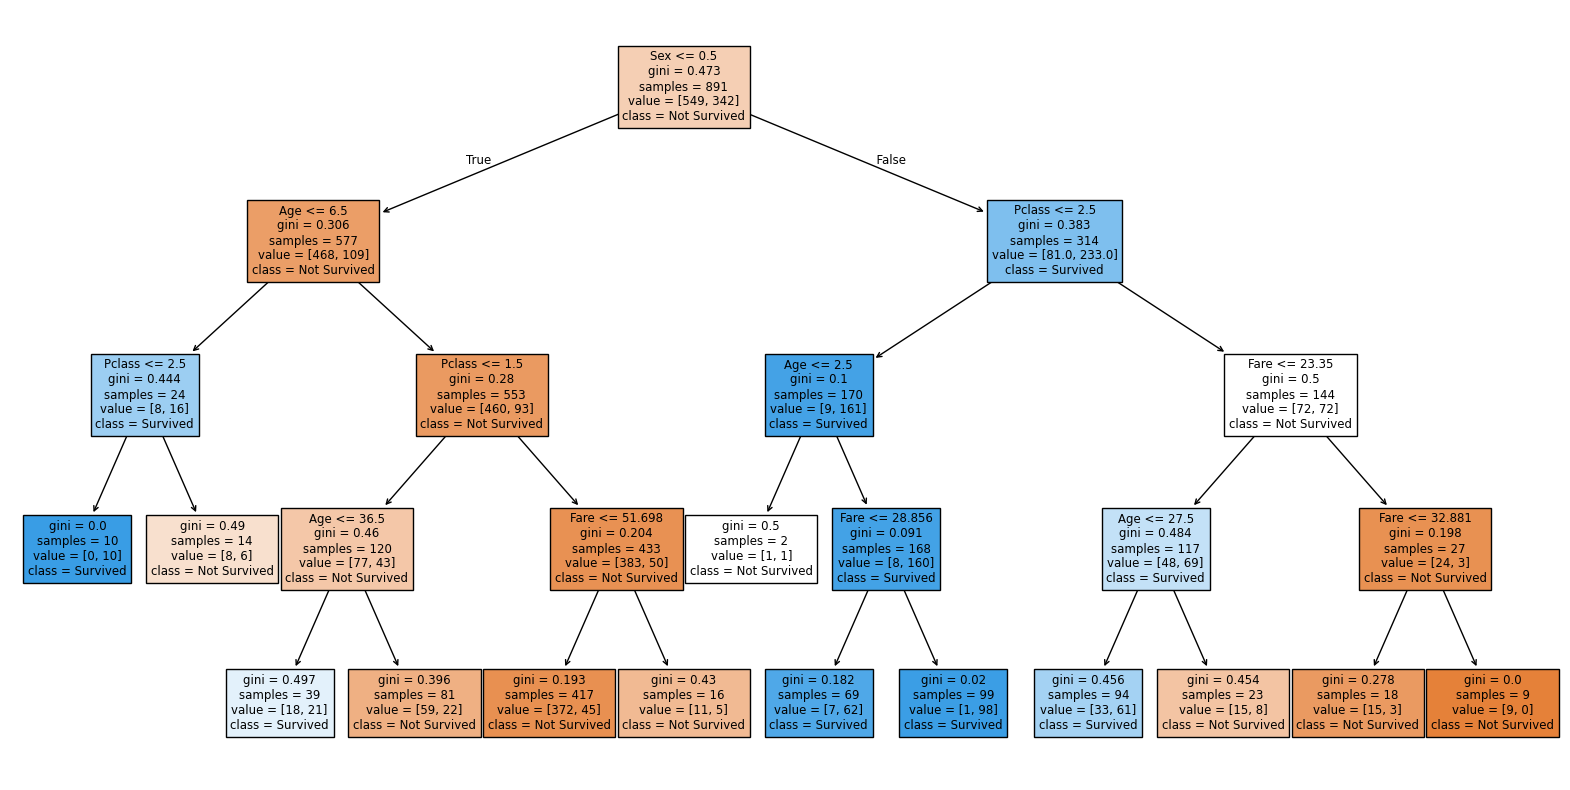

In [10]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=train_data.columns, 
               class_names=["Not Survived", "Survived"], filled=True)
plt.show()